# Advertising in E-Learning

## Motivation

The last couple of years have required people to turn to e-learning in order to improve themselves personally and professionally. This popularity has provided the e-learning companies a lot of room for expansion. In this project, we will be working for a hypothetical company that offers courses in programming with subjects such as web and mobile development and data science. The managers have asked us to come up with the two best markets to invest in advertisement.

## Data Collection

The key questions to answer in our decision-making will be:
* The types of courses potential customers want to study
* The range of money that the customers are willing to spend
* The region where most learners can be acquired
* The profile of potential learners including family and job status

The required data to answer these questions could be acquired by conducting surveys in select markets, which would be costly and time-consuming. One alternative is to look for existing datasets online that would be relevant for our goals. An ideal solution is the "New Coder Survey" that freeCodeCamp conducted in 2017:

https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/

freeCodeCamp is a free e-learning platform with a popular Medium publication (over 400,000 followers), which is why their survey attracted new coders with varying interests making it ideal for the purpose of our analysis. The dataset is publicly available on:

https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
fcc.shape

(18175, 136)

In [2]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen, most column names are self-explanatory, but due to the nature of the questions, there are lots of missing values.

In [3]:
round(fcc.isnull().sum()*100/len(fcc),0)

Age                    15.0
AttendedBootcamp        3.0
BootcampFinish         94.0
BootcampLoanYesNo      94.0
BootcampName           95.0
                       ... 
YouTubeMIT             82.0
YouTubeMozillaHacks    97.0
YouTubeOther           93.0
YouTubeSimplilearn     99.0
YouTubeTheNewBoston    84.0
Length: 136, dtype: float64

In [4]:
len(fcc.isnull().sum()[round(fcc.isnull().sum()*100/len(fcc),0) > 80])

80

In fact, 80 of the 136 columns have more than 80% of missing values meaning we can do a good amount of cleaning before working on the data. Before proceeding with the dataset, we need to check if the sample data is representative for our purpose. 

## Sample Representativeness

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. So we can check what kind of careers the potential learners are interested in:

In [5]:
# Frequency distribution table for 'JobRoleInterest'
fcc['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                            11.770595
  Front-End Web Developer                                                                                            6.435927
  Data Scientist                                                                                                     2.173913
Back-End Web Developer                                                                                               2.030892
  Mobile Developer                                                                                                   1.673341
                                                                                                                      ...    
  Data Scientist, Game Developer, Data Engineer                                                                      0.014302
Game Developer, Back-End Web Developer,   Mobile Developer, Full-Stack Web Developer                                 0

As seen, many people are interested in multiple different options, which makes them likely to enroll in multiple courses. We can check how many people are interested in at least one of web and mobile development, as they are the main focus of the company:

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


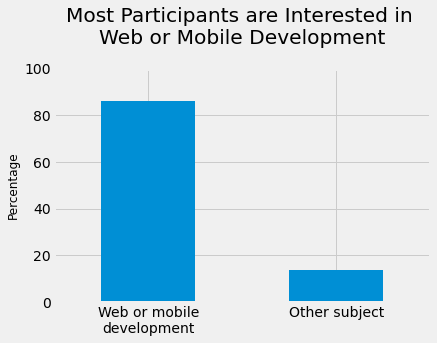

In [6]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = fcc['JobRoleInterest'].dropna()

# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

As seen, the majority (86%) are interested in web or mobile development positions, either as the only preferred job or one of several. This proves that the sample data is representative for the target audience of our e-learning company as the objective is to advertise our courses to people interested mostly in web and mobile development.

## Data Cleaning

We have seen in the previous step that most of the dataset consists of null values due to the nature of the survey questions. Moving forward, we can keep only the columns that we require to answer the questions regarding budget, region and biographical data:

In [7]:
fcc = fcc[['Age', 'AttendedBootcamp', 'CountryCitizen', 'CountryLive', 
           'EmploymentField', 'EmploymentStatus', 'Gender', 'HasChildren', 
           'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 
           'HasStudentDebt', 'HoursLearning', 'Income', 'JobRoleInterest',
           'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 
           'SchoolDegree', 'SchoolMajor']]

The remaining columns have the following missing values:

In [8]:
round(fcc.isnull().sum()*100/len(fcc),0)

Age                       15.0
AttendedBootcamp           3.0
CountryCitizen            15.0
CountryLive               16.0
EmploymentField           55.0
EmploymentStatus          21.0
Gender                    15.0
HasChildren               79.0
HasDebt                   16.0
HasFinancialDependents    16.0
HasHomeMortgage           65.0
HasStudentDebt            65.0
HoursLearning              8.0
Income                    58.0
JobRoleInterest           62.0
MaritalStatus             16.0
MoneyForLearning           9.0
MonthsProgramming          6.0
SchoolDegree              15.0
SchoolMajor               52.0
dtype: float64

As seen, there are still some features with more than 50% missing values as a result of the respondents choosing not to provide any information or not yet having answers as in the case of JobRoleInterest. However, our questions could be answered by those features that have a lot of data available, such as MoneyforLearning and CountryLive. Therefore, we can move on with the data analysis.

## Best Markets by Country

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

                          Absolute frequency  Relative frequency
United States of America                3125           45.700497
India                                    528            7.721556
United Kingdom                           315            4.606610
Canada                                   260            3.802281
Poland                                   131            1.915765
Brazil                                   129            1.886517
Germany                                  125            1.828020
Australia                                112            1.637906
Russia                                   102            1.491664
Ukraine                                   89            1.301550


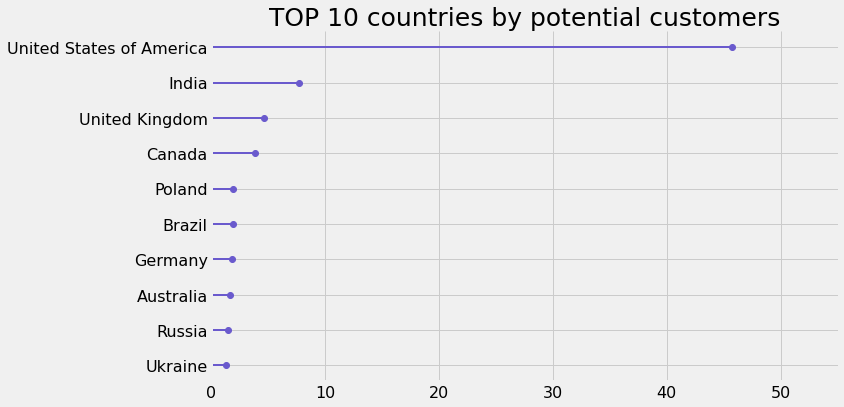

In [9]:
# Isolate the participants that answered what role they'd be interested in
fcc = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
def create_freq_table(df, column, order=False):    
    '''Creating a frequency table (both absolute and relative frequencies) 
    for a column of a dataframe, with the possibility to assign the order of the values
    '''
    if not order:
        order = df[column].value_counts().index.tolist()   # the default order if not preassigned
    abs_freq = df[column].value_counts()[order]
    rel_freq = (df[column].value_counts(normalize = True) * 100)[order]    
    freq_table = pd.DataFrame(data={'Absolute frequency': abs_freq, 
                                    'Relative frequency': rel_freq})
    return freq_table

def create_stem_plot(height, series, title, x_max):
    '''Creating a vertical stem plot for a Series'''
    fig, ax = plt.subplots(figsize=(10,height))
    ax.hlines(y=series.index, 
              xmin=0, xmax=series, 
              color='slateblue', 
              linewidth=2)
    ax.plot(series, series.index, 
            'o', 
            c='slateblue')
    ax.set_title(title, fontsize=25)
    ax.set_xlim(0,x_max)
    ax.tick_params(axis='both', labelsize=16, left=False)
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
    plt.show()
    return None

 
# Creating a frequency table of potential customers by country    
freq_table_countries = create_freq_table(df=fcc, column='CountryLive')

print(freq_table_countries.iloc[:10,:])

# Plotting TOP10 countries with their relative frequencies in %
top_10 = freq_table_countries['Relative frequency'].iloc[:10].sort_values()
create_stem_plot(height=6,
                 series=top_10,
                 title='TOP 10 countries by potential customers',
                 x_max=55) 

About 46% of our potential customers are located in the US making it the first candidate for advertising. However, the second country is harder to identify as India (7.7%), United Kingdom (4.6%) and Canada (3.8%) are all closer to each other in terms of customer distribution. Therefore, the second decision will have to be made using the information on how much the people are actually willing to spend, as free subscriptions are not profitable for the company.

## Best Markets by Spending

There are two features available to us describing the potential customers' willingness to spend on online learning:
* MoneyForLearning: the amount of money spent by participants from the moment they started coding until the moment they completed the survey 
* MonthsProgramming: the number of months they had been learning programming from the moment they started till the moment they completed the survey

Using these 2 features, we can find out how much each participant is willing to spend per month for learning. Our company sells subscriptions at a price of \$59 per month, which we can use as a reference point for comparison.

Furthermore, we can limit the analysis to the four countries we have identified above: the US, India, the United Kingdom, and Canada. Besides having the highest frequency and thus providing a good amount of data for analysis, these countries all have English as an official language making them suitable targets for our courses written in English.

We can start with creating a new column for monthly spending. To avoid dividing by 0 that comes from new students, we'll replace 0 with 1 in the MonthsProgramming column:

In [10]:
# Replace 0s with 1s in months
fcc['MonthsProgramming'].replace(0,1, inplace = True)

# New column for monthly spending
fcc['MoneyPerMonth'] = fcc['MoneyForLearning'] / fcc['MonthsProgramming']
fcc['MoneyPerMonth'].isnull().sum()

print('{} missing values, or {}%, in the `MoneyPerMonth` column:'.format(fcc['MoneyPerMonth'].isnull().sum(), round(fcc['MoneyPerMonth'].isnull().sum()*100/len(fcc),0)))

675 missing values, or 10.0%, in the `MoneyPerMonth` column:


We can drop the rows with missing spending values:

In [11]:
# Remove missing values
fcc = fcc.dropna(subset=['MoneyPerMonth', 'CountryLive'])

# Frequency table to check if we still have enough data
fcc['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

As seen, we were able to narrow down our dataset from 18000+ down to about 4000 containing only the 4 markets we are interested in, which should be enough to identify the second best market.

In [12]:
# Mean sum of money spent by students each month
countries_mean = fcc.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

print('MEAN for money per month by country:')
print(countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']])

# Median sum of money spent by students each month
countries_median = fcc.groupby('CountryLive').median()
countries_median['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

print('\nMEDIAN for money per month by country:')
print(countries_median['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']])

MEAN for money per month by country:
CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

MEDIAN for money per month by country:
CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: MoneyPerMonth, dtype: float64


It seems like people in India are willing to spend more on learning than UK or Canada which could be the result of having a much larger number of people who want to learn programming. The median tells us that most people would like to learn for free with the exception of USA. The median of 3.33 might indicate the presence of some outliers as one would expect the tendency to learn for free to hold also for the US market. We can confirm these numbers by looking at the number of people willing to spend in each market:

Potential clients:	  6212
Potential clients willing to pay: 3172 

                          Absolute frequency  Relative frequency
United States of America                1619           51.040353
India                                    201            6.336696
United Kingdom                           137            4.319042
Canada                                   114            3.593947


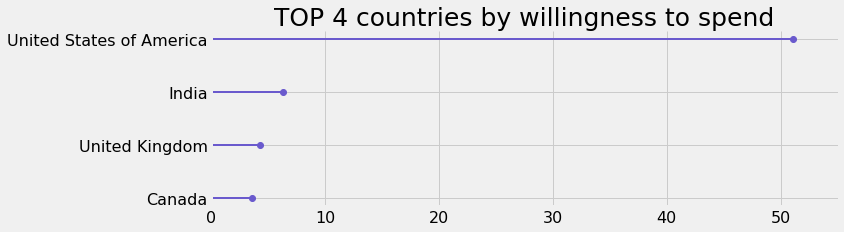

In [13]:
print('Potential clients:\t ', len(fcc))

# Considering only the respondents who paid for their learning
fcc_exp = fcc[fcc['MoneyPerMonth']>0.0].copy()

print('Potential clients willing to pay:', len(fcc_exp), '\n')

# Creating a frequency table of potential customers ready to pay   
freq_table_countries = create_freq_table(df=fcc_exp, column='CountryLive')
print(freq_table_countries.iloc[:4,:])

# Plotting the TOP4 countries
top_4 = freq_table_countries['Relative frequency'].iloc[:4].sort_values()
create_stem_plot(height=3,
                 series=top_4,
                 title='TOP 4 countries by willingness to spend',
                 x_max=55)

As seen, half of the US market is to willing to spend money for online learning which confirms them as the best market for advertising. However, we still need to deal with the outliers to increase the accuracy of our results.

## Dealing with Extreme Outliers

We can check the outliers by creating a box plot for the Top 4 countries:

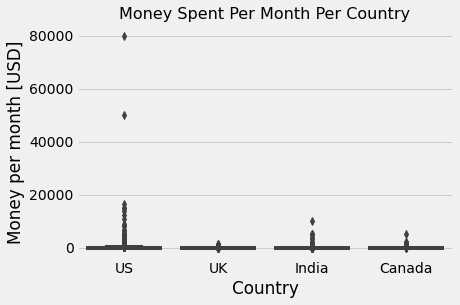

In [14]:
# Isolate only the countries of interest
top_4 = fcc[fcc['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month [USD]')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see that there are to people that supposedly spend more than \\$20k each month for learning which is extremely unlikely. So we can remove every value that goes over \\$20,000 per month and compute mean/median values:

In [15]:
# Isolate for less than 20k per month
fcc = fcc[fcc['MoneyPerMonth'] < 20000]

# Mean sum of money spent by students each month
countries_mean = fcc.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

print('MEAN for money per month by country:')
print(countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']])

# Median sum of money spent by students each month
countries_median = fcc.groupby('CountryLive').median()
countries_median['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

print('\nMEDIAN for money per month by country:')
print(countries_median['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']])

MEAN for money per month by country:
CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

MEDIAN for money per month by country:
CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: MoneyPerMonth, dtype: float64


As seen, the averages for India and Canada still seem too high when compared to the US. So we can check if we can identify more outliers for these countries:

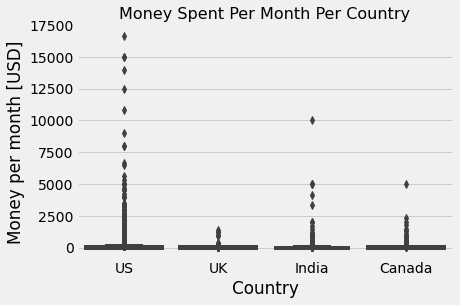

In [16]:
# Isolate only the countries of interest
top_4 = fcc[fcc['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month [USD]')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's hard to identify if these people can be eliminated without examining in more detail since there are really expensive bootcamps. 

In [17]:
# Inspect the extreme outliers for India
india_outliers = top_4[(top_4['CountryLive'] == 'India') & (top_4['MoneyPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,...,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
1728,24.0,0.0,India,India,NaN,A stay-at-home parent or homemaker,male,NaN,0.0,0.0,...,NaN,30.0,NaN,"User Experience Designer, Mobile Developer...","single, never married",20000.0,4.0,bachelor's degree,Computer Programming,5000.000000
1755,20.0,0.0,India,India,NaN,Not working and not looking for work,male,NaN,0.0,0.0,...,NaN,10.0,NaN,"Information Security, Full-Stack Web Developer...","single, never married",50000.0,15.0,bachelor's degree,Computer Science,3333.333333
7989,28.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,...,1.0,20.0,300000.0,"User Experience Designer, Back-End Web Devel...",married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,5000.000000
8126,22.0,0.0,India,India,NaN,Not working but looking for work,male,NaN,1.0,0.0,...,1.0,80.0,NaN,"Back-End Web Developer, Full-Stack Web Develop...","single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,5000.000000
13398,19.0,0.0,India,India,NaN,Unable to work,male,NaN,0.0,0.0,...,NaN,30.0,NaN,Mobile Developer,"single, never married",20000.0,2.0,bachelor's degree,Computer Science,10000.000000
15587,27.0,0.0,India,India,software development and IT,Employed for wages,male,0.0,1.0,1.0,...,1.0,36.0,60000.0,"Full-Stack Web Developer, Data Scientist","single, never married",100000.0,24.0,bachelor's degree,Communications,4166.666667


As seen, none of these 6 people have attended a bootcamp. Therefore they might have misunderstood the question of the "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?". So we can safely remove these rows:

In [18]:
# Remove the outliers for India
top_4 = top_4.drop(india_outliers.index) # using the row labels

In [19]:
# Examine the extreme outliers for the US
us_outliers = top_4[(top_4['CountryLive'] == 'United States of America') & (top_4['MoneyPerMonth'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasDebt,HasFinancialDependents,...,HasStudentDebt,HoursLearning,Income,JobRoleInterest,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,MoneyPerMonth
718,26.0,1.0,United States of America,United States of America,architecture or physical engineering,Employed for wages,male,NaN,0.0,0.0,...,NaN,35.0,44500.0,"User Experience Designer, Full-Stack Web Dev...","single, never married",8000.0,1.0,bachelor's degree,Architecture,8000.000000
1222,32.0,1.0,United States of America,United States of America,NaN,Not working and not looking for work,female,NaN,1.0,0.0,...,0.0,50.0,NaN,"Front-End Web Developer, Mobile Developer,...","single, never married",13000.0,2.0,bachelor's degree,Anthropology,6500.000000
3184,34.0,1.0,NaN,United States of America,software development and IT,Employed for wages,male,NaN,0.0,0.0,...,NaN,10.0,40000.0,"Quality Assurance Engineer, DevOps / SysAd...","single, never married",9000.0,1.0,"some college credit, no degree",NaN,9000.000000
3930,31.0,0.0,United States of America,United States of America,NaN,Not working and not looking for work,male,NaN,1.0,0.0,...,1.0,50.0,NaN,"DevOps / SysAdmin, Front-End Web Developer...",married or domestic partnership,65000.0,6.0,bachelor's degree,Biology,10833.333333
6805,46.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,...,1.0,45.0,NaN,"Full-Stack Web Developer, Game Developer, Pr...",married or domestic partnership,15000.0,1.0,bachelor's degree,Business Administration and Management,15000.000000
7198,32.0,0.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,...,1.0,4.0,NaN,"Full-Stack Web Developer, Back-End Web Developer","single, never married",70000.0,5.0,"professional degree (MBA, MD, JD, etc.)",Computer Science,14000.000000
7505,26.0,1.0,United States of America,United States of America,NaN,Not working but looking for work,male,NaN,1.0,0.0,...,1.0,40.0,NaN,"Mobile Developer, Full-Stack Web Developer, ...","single, never married",20000.0,3.0,bachelor's degree,Economics,6666.666667
9778,33.0,1.0,United States of America,United States of America,education,Employed for wages,male,NaN,1.0,0.0,...,1.0,40.0,20000.0,"Full-Stack Web Developer, Data Engineer, Qua...","single, never married",8000.0,1.0,master's degree (non-professional),Chemical Engineering,8000.000000
16650,29.0,0.0,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,1.0,1.0,...,1.0,40.0,NaN,"Product Manager, Data Engineer, Full-Stack W...",married or domestic partnership,200000.0,12.0,associate's degree,Computer Programming,16666.666667
16997,27.0,0.0,United States of America,United States of America,health care,Employed for wages,female,1.0,1.0,1.0,...,1.0,12.0,40000.0,"Mobile Developer, Game Developer, User Exp...","single, never married",12500.0,1.0,"some college credit, no degree",NaN,12500.000000


Out of these 11 extreme outliers, we can remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp. We can also see that eight of them had been programming for no more than three months when they completed the survey meaning the large amount of money gets divided by small number of months resulting in a very large monthly spending. Therefore we can remove those who never attended a bootcamp or had been programming for three months or less:

In [20]:
# Remove the people who didn't attend a bootcamp
no_bootcamp = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['MoneyPerMonth'] >= 6000) &
    (top_4['AttendedBootcamp'] == 0)
]

top_4 = top_4.drop(no_bootcamp.index)

# Remove the people that had been programming for less than 3 months
less_than_3_months = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['MoneyPerMonth'] >= 6000) &
    (top_4['MonthsProgramming'] <= 3)
]

top_4 = top_4.drop(less_than_3_months.index)

In [21]:
# Examine the extreme outliers for Canada
canada_outliers = top_4[
    (top_4['CountryLive'] == 'Canada') & 
    (top_4['MoneyPerMonth'] > 4500)]

# Remove the extreme outliers for Canada
top_4 = top_4.drop(canada_outliers.index)

After removing the most extreme outliers, we can look at the average spending per month:

In [22]:
countries_mean = top_4.groupby('CountryLive').mean()

print('MEAN for money per month by country:')
print(countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']])

MEAN for money per month by country:
CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64


As seen, the averages now seem more plausible below 100 USD for Canada and India. If we visualize the distributions again:

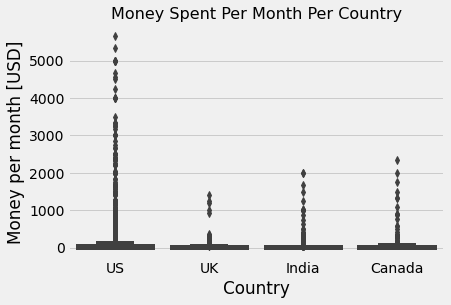

In [23]:
import seaborn as sns
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month [USD]')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Best Markets

In addition to the US, we need to identify a 2nd best market for advertising. As seen from the results, the UK customers are willing to spend about \\$45 monthly, which is lower than our subscription price of \\$59. Therefore, we can eliminate the UK from our discussion.

If we look at the number of customers for the countries:

In [24]:
# Frequency table for the 'CountryLive' column
top_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Although Canada averages \\$93 spending monthly (about \\$30 more than India), India has almost twice the number of potential customers. Therefore, it might not be advisable to focus on just one of these countries. At this point, it might be best to deliver the results to the marketing team and let them advise on further steps. Maybe they could decide to do some extra surveys in India and Canada specifically to increase the sample size for further analysis.

If we were to deliver specific numbers on how to split the advertisement budget, we could suggest the following options:

1. Advertise only in the US, which would inevitably peak some Canadian interest as the English-speaking part of Canada is culturally and geographically very close to the US.

2. Advertise only in the US and India by splitting the advertisement budget unequally based on the aforementioned factors, i.e. 70% for the US, and 30% for India.

3. Advertise in the US, India and Canada by splitting 80% for the USA, 13% for India, and 7% for Canada.

## Conclusions

In this project, we looked for the best potential markets for advertising by an e-learning company specialized in programming courses. We concluded that the best market for the advertisement campaign is the US in terms of both potential customers and the spending habits. The second best market would be best decided by the marketing team based on their domain knowledge between India and Canada. However, we laid out 3 different scenarios that could be recommended to the marketing team based on our analysis.